In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import sequence
from keras import layers
from keras.models import Model

In [27]:
data = pd.read_csv("ner_dataset.csv", encoding="latin1")
data.head(15)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O
5,NaN,through,IN,O
6,NaN,London,NNP,B-geo
7,NaN,to,TO,O
8,NaN,protest,VB,O
9,NaN,the,DT,O


In [4]:
data = data.fillna(method="ffill")
data.head(50)

<ipython-input-4-59daa018a411>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method="ffill")


,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


In [5]:
print("Unique words in corpus:", data['Word'].nunique())
print("Unique tags in corpus:", data['Tag'].nunique())

Unique words in corpus: 13134
Unique tags in corpus: 17


In [6]:
words=list(data['Word'].unique())
words.append("ENDPAD")
num_words = len(words)
tags=list(data['Tag'].unique())
num_tags = len(tags)

In [7]:
print("Unique tags are:", tags)

Unique tags are: ['O', 'B-geo', 'B-gpe', 'B-per', 'I-geo', 'B-org', 'I-org', 'B-tim', 'B-art', 'I-art', 'I-per', 'I-gpe', 'I-tim', 'B-nat', 'B-eve', 'I-eve', 'I-nat']


In [8]:
class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [9]:
getter = SentenceGetter(data)
sentences = getter.sentences
len(sentences)

6612

In [10]:
word2idx = {w: i + 1 for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}
X1 = [[word2idx[w[0]] for w in s] for s in sentences]

In [11]:
max_len = 100
X = sequence.pad_sequences(maxlen=max_len,
                  sequences=X1, padding="post",
                  value=num_words-1)

In [13]:
y1 = [[tag2idx[w[2]] for w in s] for s in sentences]

In [14]:
y = sequence.pad_sequences(maxlen=max_len,
                  sequences=y1,
                  padding="post",
                  value=tag2idx["O"])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)

In [16]:
X_train[0]
y_train[0]

array([0, 1, 0, 0, 0, 5, 6, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [17]:
input_word = layers.Input(shape=(max_len,))
embedding_layer= layers.Embedding(input_dim=num_words,output_dim=50,input_length=max_len)(input_word)
dropout_layer=layers.SpatialDropout1D(0.1)(embedding_layer)
bidirectional_lstm=layers.Bidirectional(layers.LSTM(units=100,return_sequences=True,recurrent_dropout=0.1))(dropout_layer)
output=layers.TimeDistributed(layers.Dense(num_tags,activation="softmax"))(bidirectional_lstm)
model = Model(input_word, output)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 100, 50)             │         656,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 100, 200)            │         120,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 100, 17)             │           3,417 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 780,967 (2.98 MB)

 Trainable params: 780,967 (2.98 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [23]:
history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test,y_test),
    batch_size=30,
    epochs=10,
)

Epoch 1/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 38s 216ms/step - accuracy: 0.9827 - loss: 0.0589 - val_accuracy: 0.9847 - val_loss: 0.0566
Epoch 2/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 44s 234ms/step - accuracy: 0.9879 - loss: 0.0442 - val_accuracy: 0.9870 - val_loss: 0.0477
Epoch 3/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 78s 212ms/step - accuracy: 0.9903 - loss: 0.0353 - val_accuracy: 0.9882 - val_loss: 0.0432
Epoch 4/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 37s 207ms/step - accuracy: 0.9921 - loss: 0.0286 - val_accuracy: 0.9889 - val_loss: 0.0400
Epoch 5/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 41s 207ms/step - accuracy: 0.9937 - loss: 0.0227 - val_accuracy: 0.9891 - val_loss: 0.0396
Epoch 6/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 38s 216ms/step - accuracy: 0.9942 - loss: 0.0198 - val_accuracy: 0.9895 - val_loss: 0.0389
Epoch 7/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 38s 215ms/step - accuracy: 0.9949 - loss: 0.0176 - val_accuracy: 0.9896 - val_loss: 0.0388
Epoch 8/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 38s 215ms/step - accuracy: 0.9957 - loss: 0

In [24]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.983564,0.057151,0.984671,0.056553
1,0.988240,0.043402,0.986999,0.047691
2,0.990547,0.034180,0.988163,0.043157
3,0.992314,0.027836,0.988934,0.039975
4,0.993447,0.023347,0.989085,0.039628


<Axes: >

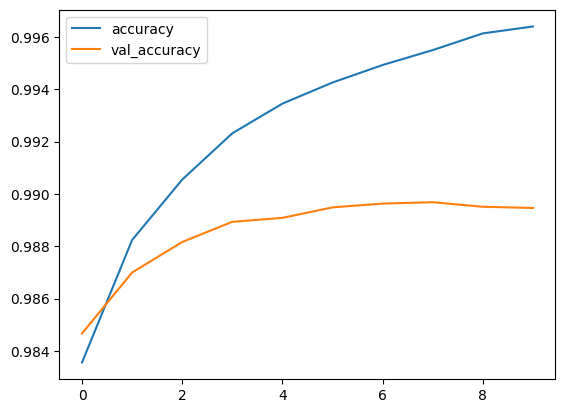

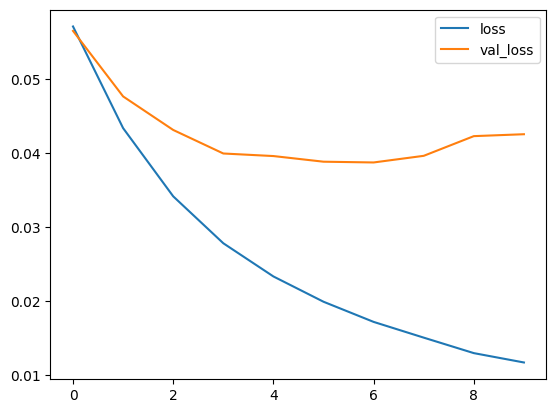

In [25]:
metrics[['accuracy','val_accuracy']].plot()
metrics[['loss','val_loss']].plot()

In [26]:
i = 25
p = model.predict(np.array([X_test[i]]))
p = np.argmax(p, axis=-1)
y_true = y_test[i]
print("{:15}{:5}\t {}\n".format("Word", "True", "Pred"))
print("-" *30)
for w, true, pred in zip(X_test[i], y_true, p[0]):
    print("{:15}{}\t{}".format(words[w-1], tags[true], tags[pred]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Word           True 	 Pred

------------------------------
The            O	O
World          B-org	B-org
Health         I-org	I-org
Organization   I-org	I-org
estimates      O	O
that           O	O
between        O	O
five           B-tim	I-tim
and            I-tim	O
10             O	O
percent        O	O
of             O	O
us             O	O
suffer         O	O
from           O	O
depression     O	O
at             O	O
any            O	O
given          O	O
time           O	O
.              O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose    